In [114]:
import numpy as np
import pandas as pd

In [115]:
training_data = np.load(f'../fashion_train.npy')
test_data = np.load(f'../fashion_test.npy')

In [116]:
df = pd.DataFrame(training_data)


df_2classes = df[df.iloc[:, -1] < 2]
df_2classes.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,3,0,0,0,41,...,63,78,11,0,2,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,32,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,1,0,0,0,...,168,119,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,14,...,1,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,26,...,0,0,0,0,0,0,0,0,0,1


### Create subset for fast testing

In [124]:
# Split data: 80% sample
df_2classes_subset = df_2classes.sample(frac=0.8, random_state=1)

# Separate the last column to keep it unchanged
last_column = df_2classes_subset.iloc[:, -1]

# Apply transformation to all columns except the last one
df_2classes_subset.iloc[:, :-1] = (df_2classes_subset.iloc[:, :-1] / 255 * 10).round().astype(int)

# Concatenate the transformed data and the last column
df_2classes_subset = pd.concat([df_2classes_subset.iloc[:, :-1], last_column], axis=1)

df_2classes_subset


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3499,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3907,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
951,0,0,0,0,0,0,0,0,0,7,...,3,0,0,0,0,0,0,0,0,1
5903,0,0,0,0,0,0,0,0,0,0,...,4,5,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7350,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
4327,0,0,0,0,0,0,0,0,0,1,...,4,5,6,1,0,0,0,0,0,0
5203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Decision tree (Needs water)

In [9]:
def decision_tree(data):
    pass


def split_data(data):
    current_min = 2
    n = len(data)
    for column in data.columns[:-1]:
        for value in data[column].unique():
            split1 = data[data[column] >= value]
            split2 = data[data[column] < value]
            gini1 = gini_impurity(split1)
            gini2 = gini_impurity(split2)
            total = (gini1 * len(split1) + gini2 * len(split2)) / n
            if total < current_min:
                current_min = total
                min_gini = [current_min, column, value]
    
    return min_gini



def gini_impurity(data):
    class_counts = np.unique(data.iloc[:, -1], return_counts=True)[1]
    probabilities = class_counts / len(data)
    gini = 1 - np.sum(probabilities ** 2)
    return gini



def train_model(data):
    pass


def predict(data):
    pass



In [10]:
split_data(df_2classes_subset)

KeyboardInterrupt: 

In [18]:
def decision_tree(data):
    pass


def split_data(data):
    current_min = 2
    n = len(data)
    for column in data.columns[:-1]:
        for value in data[column].unique():
            split1 = data[data[column] >= value]
            split2 = data[data[column] < value]
            gini1 = gini_impurity(split1)
            gini2 = gini_impurity(split2)
            total = (gini1 * len(split1) + gini2 * len(split2)) / n
            if total < current_min:
                current_min = total
                min_gini = [current_min, column, value]
    
    return min_gini



def gini_impurity(data):
    class_counts = np.unique(data.iloc[:, -1], return_counts=True)[1]
    probabilities = class_counts / len(data)
    gini = 1 - np.sum(probabilities ** 2)
    return gini



def train_model(data,max_depth):
    dicts = [dict() for i in range(n)]

    for layer in range(1, max_depth + 1):
        current_width = 2 ** (layer - 1) 
        for n in range(1,current_width+1):
            print(f"dict_{layer}: {n}")

        
        print(dicts)
    
                
           







    


def predict(data):
    pass



In [125]:
def find_best_split(data):
 
    current_min = 2  # Gini ranges from 0 to 1; this initializes a high value.
    best_split1, best_split2 = None, None
    split_info = None
    n = len(data)
 
    for column in data.columns[:-1]:
        # Sort data by the column for efficient split calculations
        sorted_data = data.sort_values(by=column)
        values = sorted_data[column].values
        labels = sorted_data[data.columns[-1]].values
 
        # Initialize running totals for calculating Gini efficiently
        left_counts = np.zeros_like(labels, dtype=float)
        right_counts = np.bincount(labels, minlength=2).astype(float)
        total_right = len(labels)
 
        for i in range(len(values) - 1):
            label = labels[i]
            left_counts[label] += 1
            right_counts[label] -= 1
 
            total_left = i + 1
            total_right -= 1
           
 
            # Only consider unique values for splits
            if values[i] == values[i + 1]:
                continue
 
            gini_left = 1.0 - np.sum((left_counts / total_left) ** 2)
            gini_right = 1.0 - np.sum((right_counts / total_right) ** 2)
            weighted_gini = (gini_left * total_left + gini_right * total_right) / n
 
            if weighted_gini < current_min:
                current_min = weighted_gini
                split_info = [current_min, column, values[i]]
                best_split1 = sorted_data.iloc[:i + 1]
                best_split2 = sorted_data.iloc[i + 1:]
 
    return split_info, 

In [ ]:
gini,column,value = find_best_split(df_2classes_subset)[0]
print(gini,column,value)


0.13929242068351066 546 0


In [130]:
df1ost = df_2classes_subset[df_2classes_subset[546 ] > 0]
print(df1ost.shape)
print(df_2classes_subset.shape)



(1801, 785)
(3184, 785)


In [ ]:
k = 4
splits = {i: [] for i in range(k)}

def split_data(data,level):
    gini,column,value = find_best_split(data)[0]
    df1 = data[data[column] > value]
    df2 = data[data[column] <= value]

  # Update splits dictionary
    splits[level].append((gini,column,value))
    #splits[level].append((len(data), split_index))


    # Recursive splitting until level reaches `k`
    if level + 1 < k:
        split_data(df1, level + 1)
        split_data(df2, level + 1)


split_data(df_2classes_subset,0)


{0: [(0.13929242068351066, 546, 0)], 1: [(0.08119985739062997, 624, 0), (0.014698553709253388, 549, 0)], 2: [(0.04726488137001606, 657, 0), (0.07650273224043716, 147, 1), (0.0029303807658104734, 96, 1), (0.16875, 435, 7)], 3: [(0.029141390881893124, 658, 0), (0.1575224292615597, 660, 1), (0.0, 7, 0), (0.0322342972923191, 524, 0), (0.0, 574, 2), (0.0, 7, 0), (0.0, 9, 1), (0.0, 5, 0)]}


In [135]:
print(splits[0])
print(splits[1])
print(splits[2])
print(splits[3])



[(0.13929242068351066, 546, 0)]
[(0.08119985739062997, 624, 0), (0.014698553709253388, 549, 0)]
[(0.04726488137001606, 657, 0), (0.07650273224043716, 147, 1), (0.0029303807658104734, 96, 1), (0.16875, 435, 7)]
[(0.029141390881893124, 658, 0), (0.1575224292615597, 660, 1), (0.0, 7, 0), (0.0322342972923191, 524, 0), (0.0, 574, 2), (0.0, 7, 0), (0.0, 9, 1), (0.0, 5, 0)]


In [51]:
import pandas as pd

# Initialize splits dictionary to track the split indices
splits = dict()

def split_data(data, k):
    # Base case: stop when k reaches a certain limit
    if k == 5:
        return data
    
    # Calculate split index
    split_index = len(data) // 2
    
    # Split the data
    df1 = data.iloc[:split_index]
    df2 = data.iloc[split_index:]
    
    # Store the split information
    splits[k] = [split_index, len(df1), len(df2)]
    
    # Recursively split the two parts
    split_data(df1, k + 1)
    split_data(df2, k + 1)
    
    return splits

# Example usage
# Assuming df_2classes_subset is your DataFrame
splits = split_data(df_2classes_subset, 0)

print(splits)


{0: [995, 995, 995], 1: [497, 497, 498], 2: [249, 249, 249], 3: [124, 124, 125], 4: [62, 62, 63]}


naming scheme
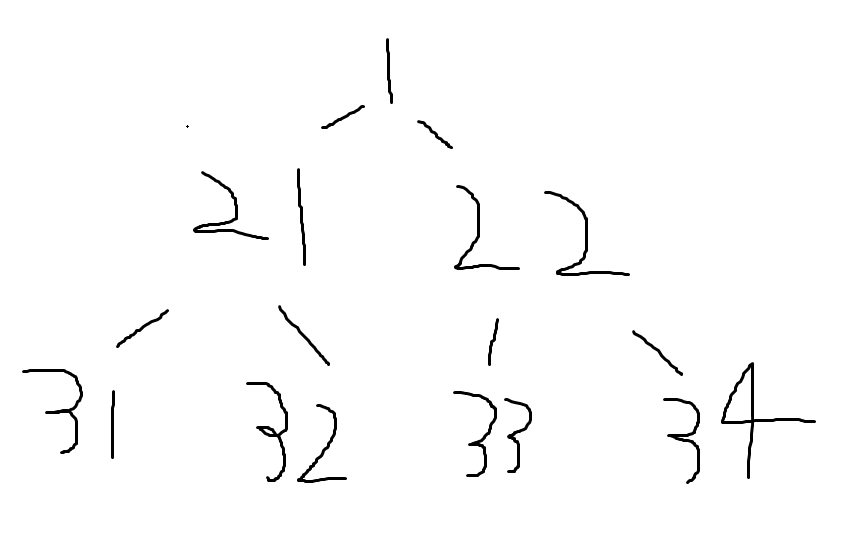

In [ ]:
def incrementer(counter=[0]):
    counter[0] += 1
    return counter[0]

def generate_tree_names(node_name, depth, tree_dict=None):
    if tree_dict is None:
        tree_dict = {}
    
    # Add the current node to the dictionary
    tree_dict[node_name] = incrementer()  # You can add values or other data here as needed
    
    # Base case: stop if we've reached the desired depth
    if depth > 0:
        # Recur for left child (appending '0') and right child (appending '1')
        generate_tree_names(node_name + '1', depth - 1, tree_dict)
        generate_tree_names(node_name + '2', depth - 1, tree_dict)
    
    return tree_dict

# Example usage: Generate a binary tree with 3 levels starting from node '1'
binary_tree_dict = generate_tree_names('1', 2)
print(binary_tree_dict)


{'1': 1, '11': 2, '111': 3, '112': 4, '12': 5, '121': 6, '122': 7}
